# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>


## Exercise 11.3

The third test was made on the **trigonometric 2D function**
$$
f(x,y) = \sin(x^2+y^2)
$$
in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

To find a good model, I started from the best model of the previous exercise ([200, 50, 100, 50], 30 epochs, *relu* as activation function, *SGD* as optimiser, *MSE* as loss function) and proceeded in a way similar to the previous exercise to find the model which minimises the loss.
I tried to use *selu* as activation function, which is very performing, but the results overfitted, and I couldn't get good results even decreasing the number of neurons and of epochs.
So I tried a hybrid model, with two layers activated by *selu* and two layers activated by *relu*.
Then I tried to change the optimiser, Adam worked really well but overfitted a bit so I lowered the number of neurons in each layer.
At last, I tried to change the loss function but MSE remained the one which performed better.
Below I reported the plot of the results I got with my best model.

In [ ]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
%matplotlib inline


np.random.seed(0)

In [ ]:
#f(x, y) definition
def f(x, y) :
    return np.sin(x**2 + y**2)

In [ ]:
#Data
np.random.seed(0)
sigma = 0.5 #Gaussian noise
x_train = np.random.uniform(-3/2, 3/2, 2000)
y_train = np.random.uniform(-3/2, 3/2, 2000)
x_valid = np.random.uniform(-3/2, 3/2, 200)
y_valid = np.random.uniform (-3/2, 3/2, 200)
x_valid.sort()
y_valid.sort()
z_target = f(x_valid, y_valid) # ideal (target) linear function
z_train = np.random.normal(f(x_train, y_train), sigma) 
z_valid = np.random.normal(f(x_valid, y_valid), sigma)

xy_train = np.column_stack((x_train, y_train))
xy_valid = np.column_stack((x_valid, y_valid))



In [ ]:

model = tf.keras.Sequential()
model.add(Dense(90, input_shape=(2,), activation="relu"))#
model.add(Dense(30, activation="selu"))#
model.add(Dense(80, activation="relu"))#
model.add(Dense(40, activation="selu"))
model.add(Dense(1, ))#activation="selu"
model.compile(optimizer='Adam', loss='mse', metrics=['mse'])
model.summary()

history = model.fit(x=xy_train, y=z_train, batch_size=32, epochs=30, shuffle=True, validation_data=(xy_valid, z_valid))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 90)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2730      
_________________________________________________________________
dense_2 (Dense)              (None, 80)                2480      
_________________________________________________________________
dense_3 (Dense)              (None, 40)                3240      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 41        
Total params: 8,761
Trainable params: 8,761
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
63/63 [==============================] - 2s 12ms/step - loss: 0.3977 - mse: 0.3977 - val_loss: 0.5000 - val_m

In [ ]:
print("PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):")
score = model.evaluate(xy_valid, z_valid, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):")
score = model.evaluate(xy_valid, z_target, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):
Test loss: 0.2871111333370209
Test accuracy: 0.2871111333370209
PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):
Test loss: 0.03484763577580452
Test accuracy: 0.03484763577580452


200 200 200


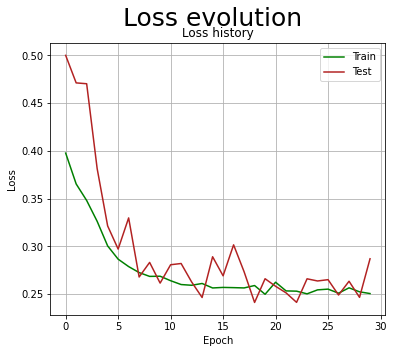

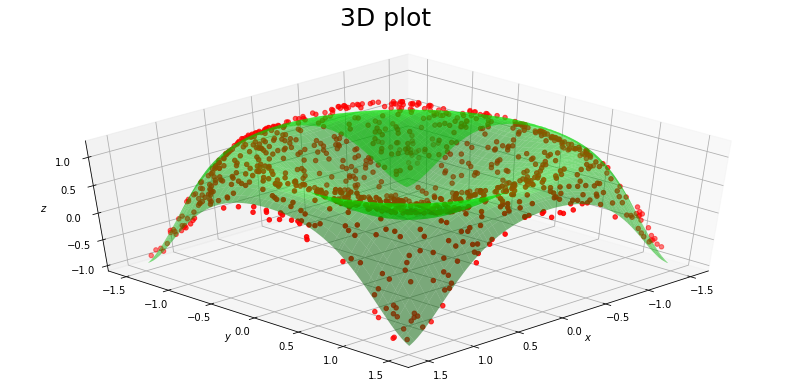

In [ ]:
fig1=plt.figure(figsize=(6,5))
fig1.suptitle("Loss evolution", fontsize=25)
plt.plot(history.history['loss'], color="green")
plt.plot(history.history['val_loss'], color="firebrick")
plt.title('Loss history')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

fig=plt.figure(figsize=(14,6))
fig.suptitle("3D plot", fontsize=25)

x_predicted = np.random.uniform(-3/2, 3/2, 1000)
y_predicted = np.random.uniform(-3/2, 3/2, 1000)
xy_predicted = np.column_stack((x_predicted, y_predicted))
z_predicted = model.predict(xy_predicted)
X, Y = np.meshgrid(x_valid, y_valid)
z_target = np.sin(X*X+Y*Y)
print (len(X), len (Y), len (z_target))
ax = Axes3D(fig)
ax = plt.axes(projection="3d")  
ax.scatter3D(x_predicted, y_predicted, z_predicted, color="red")
#ax.contour3D(X, Y, z_target, 20, cmap='binary')
ax.plot_surface(X, Y, z_target, color="lime", alpha=0.5)
#ax.plot_trisurf(X, Y, z_target,cmap="viridis",edgecolor="none", alpha=0.2)
#ax.scatter3D(x,y, y_val, color='r')
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$z$")
plt.grid(True)
ax.view_init(45, 45)

plt.show()


 


